Análisis exploratorio

In [6]:
import pandas as pd

# Cargar el archivo de importación y saltar las filas con encabezados adicionales
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']]


print(importacion_df_filtered.head())

importacion_df_filtered.to_excel('./importacion_filtrada.xlsx', index=False)



         Fecha  GasolinaRegular  GasolinaSuper    DieselLS     GasLicuado
204 2018-01-01        571858.06      535784.70  1153831.89  396363.050000
205 2018-02-01        509366.10      629467.91   921684.12  591000.020476
206 2018-03-01        563899.06      529507.15   889227.10  644245.403333
207 2018-04-01        510830.00      617512.28   696962.77  188590.813333
208 2018-05-01        580825.11      580329.35  1592580.34  636234.130952


Descriptive Statistics:
                                Fecha  GasolinaRegular  GasolinaSuper  \
count                             77        77.000000   7.700000e+01   
mean   2021-03-01 17:45:58.441558528    711623.080519   6.214766e+05   
min              2018-01-01 00:00:00    329134.180000   1.702925e+05   
25%              2019-08-01 00:00:00    596798.220000   5.624981e+05   
50%              2021-03-01 00:00:00    725101.200000   6.236952e+05   
75%              2022-10-01 00:00:00    833544.640000   6.820608e+05   
max              2024-05-01 00:00:00    987872.050000   1.227174e+06   
std                              NaN    146983.267786   1.327701e+05   

           DieselLS    GasLicuado  
count  7.700000e+01  7.700000e+01  
mean   1.144352e+06  5.970326e+05  
min    6.910664e+05  1.885908e+05  
25%    1.011873e+06  4.977807e+05  
50%    1.153832e+06  6.343201e+05  
75%    1.294042e+06  6.841601e+05  
max    1.592580e+06  1.077123e+06  
std    2.220634e+05  1.587627e+05  

N

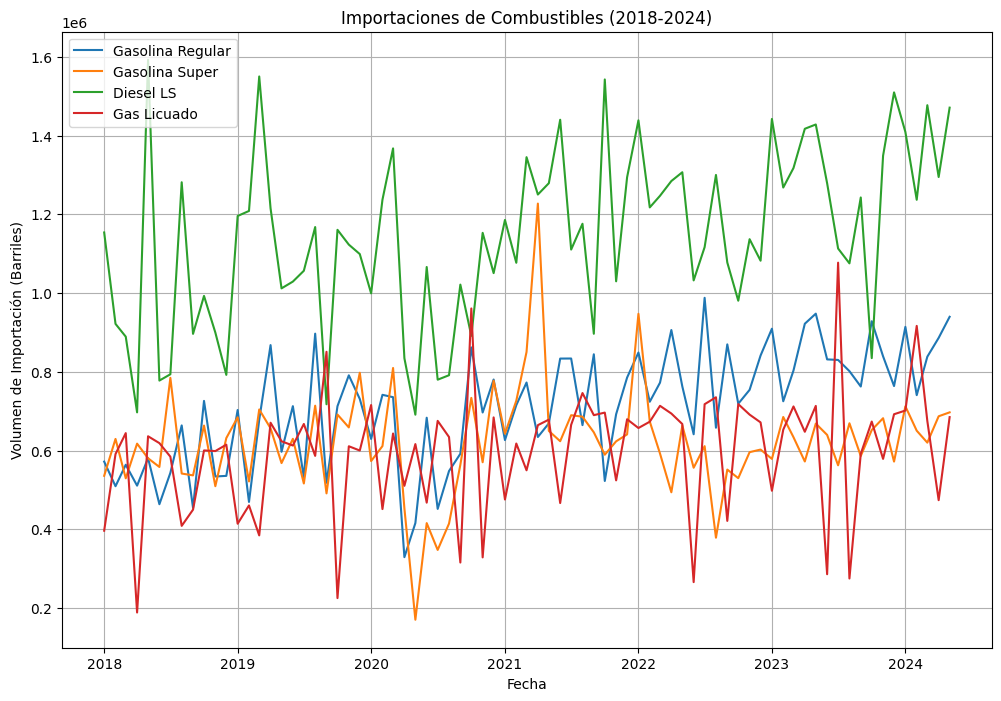

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Cargar el archivo de importación y saltar las filas con encabezados adicionales
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']]

# Convertir las columnas de datos a numéricas
for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']:
    importacion_df_filtered[column] = pd.to_numeric(importacion_df_filtered[column], errors='coerce')

# Análisis descriptivo
descriptive_stats = importacion_df_filtered.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Verificar la distribución normal de las variables continuas
normality_tests = {column: shapiro(importacion_df_filtered[column].dropna()) for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']}
print("\nNormality Tests:\n", normality_tests)

# Identificar meses con mayor volumen de importaciones
importacion_df_filtered['Mes'] = importacion_df_filtered['Fecha'].dt.month
importacion_df_filtered['Año'] = importacion_df_filtered['Fecha'].dt.year
monthly_imports = importacion_df_filtered.groupby('Mes').sum(numeric_only=True)
print("\nMonthly Imports:\n", monthly_imports)

# Picos anuales en importaciones por tipo de combustible
annual_imports = importacion_df_filtered.groupby('Año').sum(numeric_only=True)
print("\nAnnual Imports:\n", annual_imports)

# Comportamiento durante la pandemia (2020-2021)
pandemic_period = importacion_df_filtered[(importacion_df_filtered['Fecha'] >= '2020-01-01') & (importacion_df_filtered['Fecha'] <= '2021-12-31')]
print("\nPandemic Period Imports (2020-2021):\n", pandemic_period.describe())

# Graficar los resultados
plt.figure(figsize=(12, 8))
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasolinaRegular', label='Gasolina Regular')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasolinaSuper', label='Gasolina Super')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='DieselLS', label='Diesel LS')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasLicuado', label='Gas Licuado')
plt.title('Importaciones de Combustibles (2018-2024)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.legend()
plt.grid(True)
plt.show()


Descriptive Statistics:
                                Fecha  GasolinaRegular  GasolinaSuper  \
count                             77        77.000000   7.700000e+01   
mean   2021-03-01 17:45:58.441558528    711623.080519   6.214766e+05   
min              2018-01-01 00:00:00    329134.180000   1.702925e+05   
25%              2019-08-01 00:00:00    596798.220000   5.624981e+05   
50%              2021-03-01 00:00:00    725101.200000   6.236952e+05   
75%              2022-10-01 00:00:00    833544.640000   6.820608e+05   
max              2024-05-01 00:00:00    987872.050000   1.227174e+06   
std                              NaN    146983.267786   1.327701e+05   

           DieselLS    GasLicuado  
count  7.700000e+01  7.700000e+01  
mean   1.144352e+06  5.970326e+05  
min    6.910664e+05  1.885908e+05  
25%    1.011873e+06  4.977807e+05  
50%    1.153832e+06  6.343201e+05  
75%    1.294042e+06  6.841601e+05  
max    1.592580e+06  1.077123e+06  
std    2.220634e+05  1.587627e+05  

N

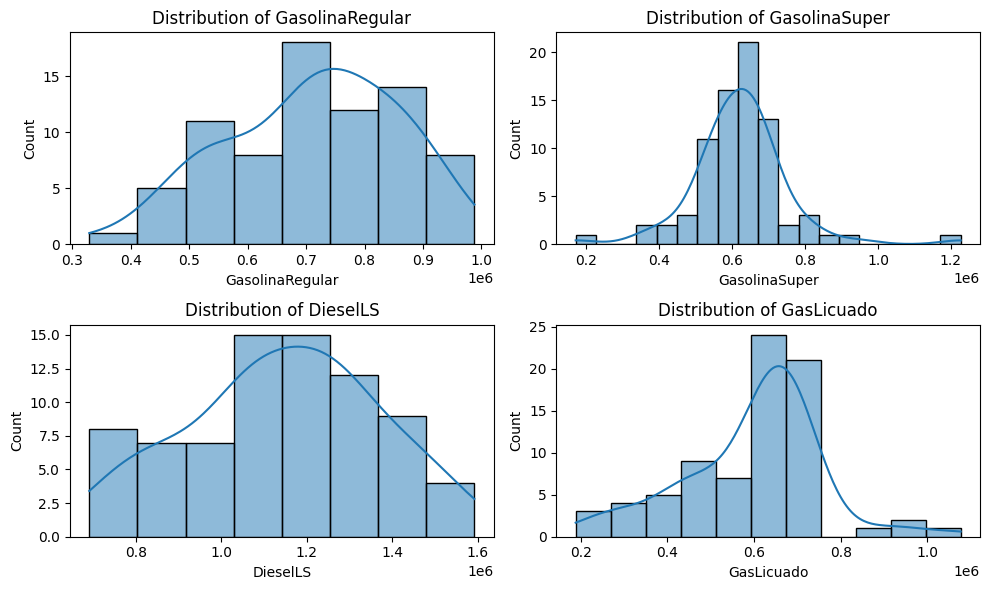

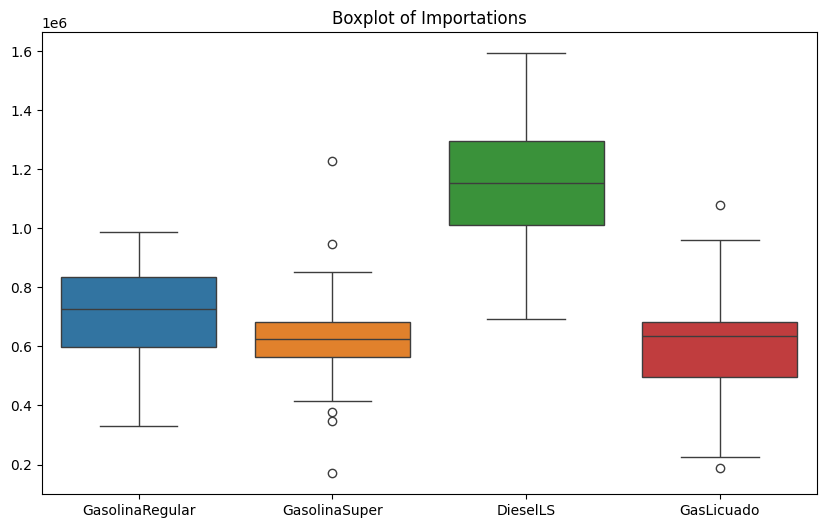

<Figure size 1000x600 with 0 Axes>

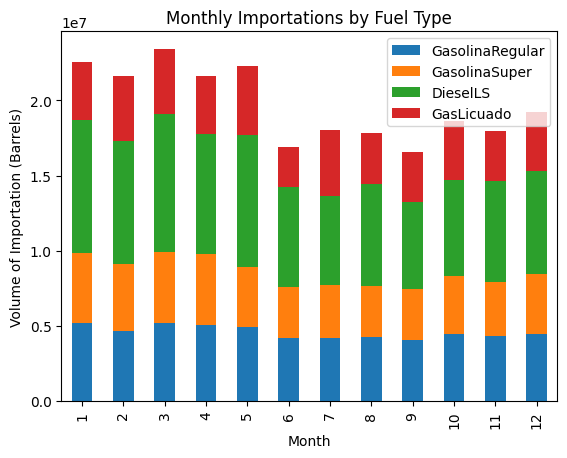

<Figure size 1000x600 with 0 Axes>

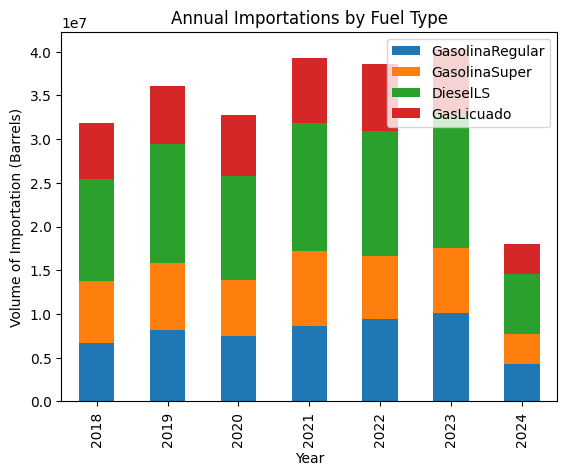

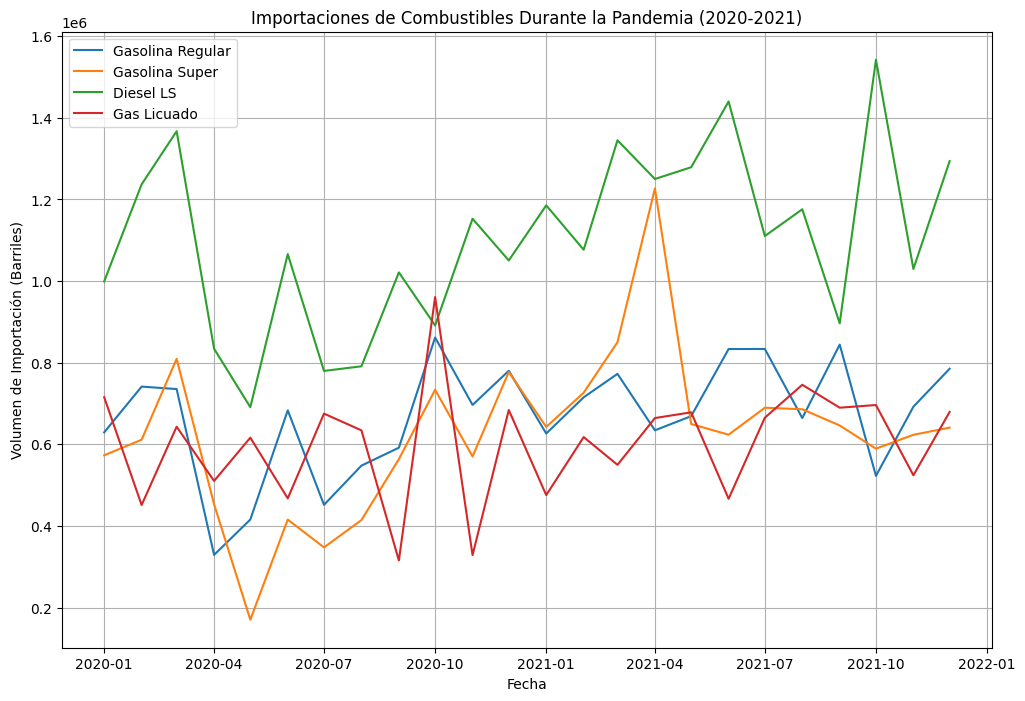

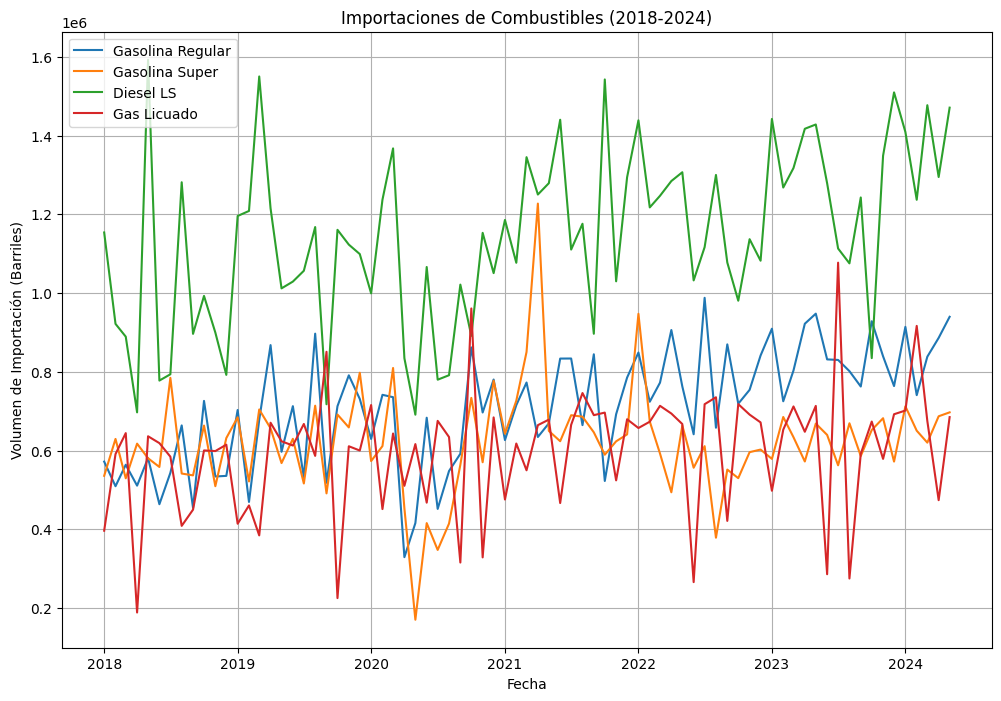

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Cargar el archivo de importación y saltar las filas con encabezados adicionales
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']]

# Convertir las columnas de datos a numéricas
for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']:
    importacion_df_filtered[column] = pd.to_numeric(importacion_df_filtered[column], errors='coerce')

# Análisis descriptivo
descriptive_stats = importacion_df_filtered.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Verificar la distribución normal de las variables continuas
normality_tests = {column: shapiro(importacion_df_filtered[column].dropna()) for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']}
print("\nNormality Tests:\n", normality_tests)

# Identificar meses con mayor volumen de importaciones
importacion_df_filtered['Mes'] = importacion_df_filtered['Fecha'].dt.month
importacion_df_filtered['Año'] = importacion_df_filtered['Fecha'].dt.year
monthly_imports = importacion_df_filtered.groupby('Mes').sum(numeric_only=True)
print("\nMonthly Imports:\n", monthly_imports)

# Picos anuales en importaciones por tipo de combustible
annual_imports = importacion_df_filtered.groupby('Año').sum(numeric_only=True)
print("\nAnnual Imports:\n", annual_imports)

# Comportamiento durante la pandemia (2020-2021)
pandemic_period = importacion_df_filtered[(importacion_df_filtered['Fecha'] >= '2020-01-01') & (importacion_df_filtered['Fecha'] <= '2021-12-31')]
print("\nPandemic Period Imports (2020-2021):\n", pandemic_period.describe())

# Gráficos adicionales

# Gráficos de distribución
plt.figure(figsize=(10, 6))
for i, column in enumerate(['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(importacion_df_filtered[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Gráficos de caja (boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=importacion_df_filtered[['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']])
plt.title('Boxplot of Importations')
plt.show()

# Gráficos de barras para importaciones mensuales
plt.figure(figsize=(10, 6))
monthly_imports[['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']].plot(kind='bar', stacked=True)
plt.title('Monthly Importations by Fuel Type')
plt.xlabel('Month')
plt.ylabel('Volume of Importation (Barrels)')
plt.legend(loc='upper right')
plt.show()

# Gráficos de barras para importaciones anuales
plt.figure(figsize=(10, 6))
annual_imports[['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']].plot(kind='bar', stacked=True)
plt.title('Annual Importations by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Volume of Importation (Barrels)')
plt.legend(loc='upper right')
plt.show()

# Gráfico de líneas para comportamiento durante la pandemia
plt.figure(figsize=(12, 8))
sns.lineplot(data=pandemic_period, x='Fecha', y='GasolinaRegular', label='Gasolina Regular')
sns.lineplot(data=pandemic_period, x='Fecha', y='GasolinaSuper', label='Gasolina Super')
sns.lineplot(data=pandemic_period, x='Fecha', y='DieselLS', label='Diesel LS')
sns.lineplot(data=pandemic_period, x='Fecha', y='GasLicuado', label='Gas Licuado')
plt.title('Importaciones de Combustibles Durante la Pandemia (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de líneas para todo el período
plt.figure(figsize=(12, 8))
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasolinaRegular', label='Gasolina Regular')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasolinaSuper', label='Gasolina Super')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='DieselLS', label='Diesel LS')
sns.lineplot(data=importacion_df_filtered, x='Fecha', y='GasLicuado', label='Gas Licuado')
plt.title('Importaciones de Combustibles (2018-2024)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.legend()
plt.grid(True)
plt.show()


1. Importaciones de Combustibles (2018-2024)

En esta gráfica de líneas se observa el comportamiento de las importaciones de Gasolina Regular, Gasolina Super, Diesel LS y Gas Licuado desde 2018 hasta 2024. Algunas observaciones clave:

Diesel LS presenta la mayor volatilidad y volumen de importación en comparación con los otros combustibles.
Gasolina Regular y Gasolina Super muestran un comportamiento más estable con picos ocasionales.
Gas Licuado tiene importaciones relativamente constantes con algunas variaciones estacionales


2. Importaciones de Combustibles Durante la Pandemia (2020-2021)



Esta gráfica de líneas muestra las importaciones durante la pandemia. Las observaciones importantes incluyen:

Un aumento notable en la importación de Diesel LS a principios de 2020.
Fluctuaciones en las importaciones de Gasolina Regular y Gasolina Super durante el mismo período.
Las importaciones de Gas Licuado también muestran variaciones, pero con menos volatilidad que el Diesel LS.


3. Importaciones Anuales por Tipo de Combustible

Esta gráfica de barras apiladas destaca las importaciones anuales de cada tipo de combustible:

Diesel LS domina las importaciones en todos los años, siendo la fracción más grande de las importaciones totales.
Gasolina Regular y Gasolina Super representan una parte significativa, pero menor en comparación con Diesel LS.
Gas Licuado tiene la menor fracción, pero muestra una contribución constante a las importaciones totales.


4. Importaciones Mensuales por Tipo de Combustible 

En esta gráfica de barras apiladas se muestran las importaciones mensuales:

Los primeros meses del año (enero a mayo) tienden a tener volúmenes de importación más altos para todos los combustibles.

Una disminución notable en las importaciones durante los meses de verano (junio a agosto).

Un aumento gradual hacia finales del año.


5. Boxplot de Importaciones

Los boxplots proporcionan una visualización de la distribución y los outliers en las importaciones:

Diesel LS tiene la mediana más alta y muestra una distribución amplia con varios outliers.

Gasolina Regular y Gasolina Super tienen distribuciones más estrechas y mediana más baja.

Gas Licuado muestra una distribución intermedia con algunos outliers.

6. Distribución de Importaciones

Las gráficas de distribución con KDE muestran la forma de las distribuciones:

Gasolina Regular y Diesel LS muestran distribuciones cercanas a la normalidad, aunque con algunas desviaciones.

Gasolina Super y Gas Licuado tienen distribuciones menos simétricas, con Gasolina Super presentando más asimetría y kurtosis.


Volatilidad: Diesel LS muestra la mayor volatilidad en las importaciones tanto en términos absolutos como relativos.
Estacionalidad: Se observa una estacionalidad en las importaciones, con aumentos en los primeros meses del año y disminuciones durante el verano.
Pandemia: Durante la pandemia, hubo fluctuaciones notables, especialmente en Diesel LS, que tuvo un aumento significativo a principios de 2020.
Distribución: Las importaciones de Diesel LS dominan el panorama, mientras que Gasolina Regular y Gasolina Super son más estables y consistentes.



a. Especificar Inicio, Fin y Frecuencia

Inicio: 2018-01-01 00:00:00, Fin: 2024-05-01 00:00:00, Frecuencia: M


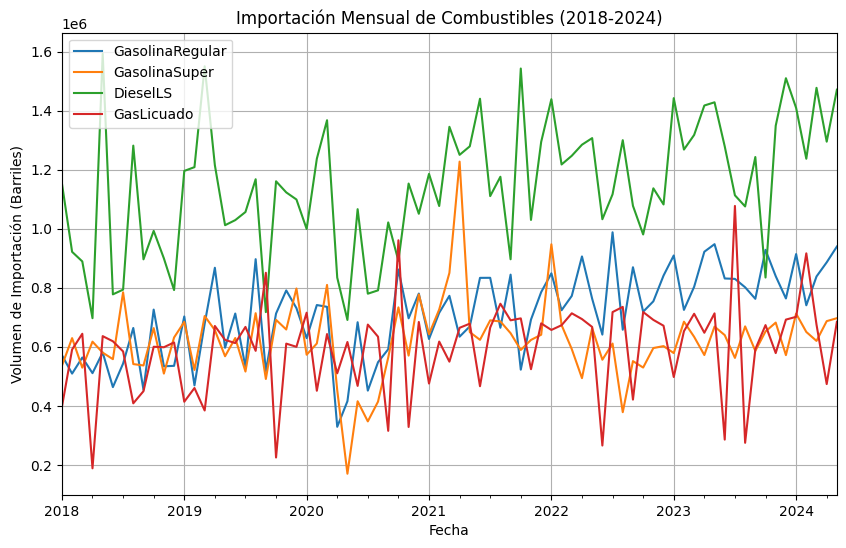

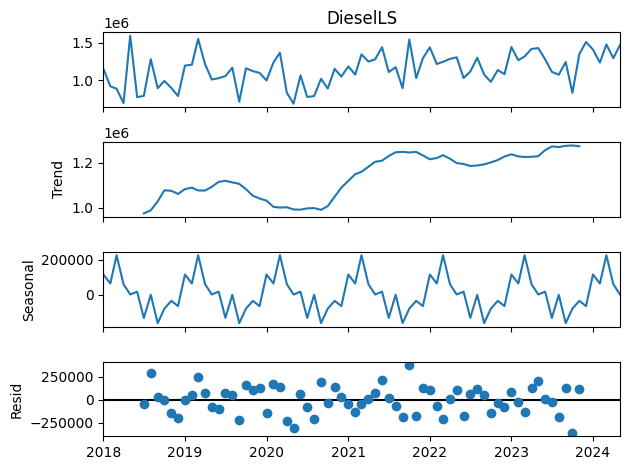

ADF Statistic: -4.253034786666131
p-value: 0.0005351722312309876


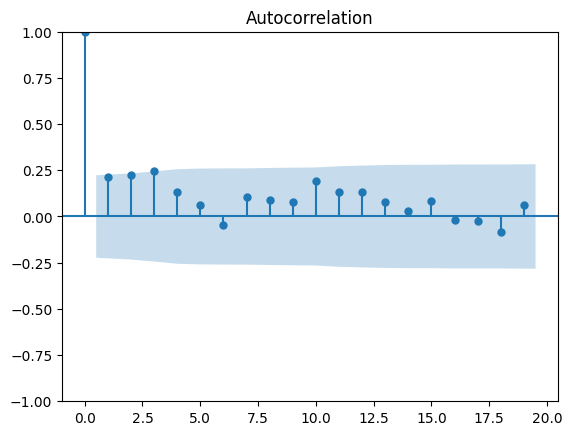

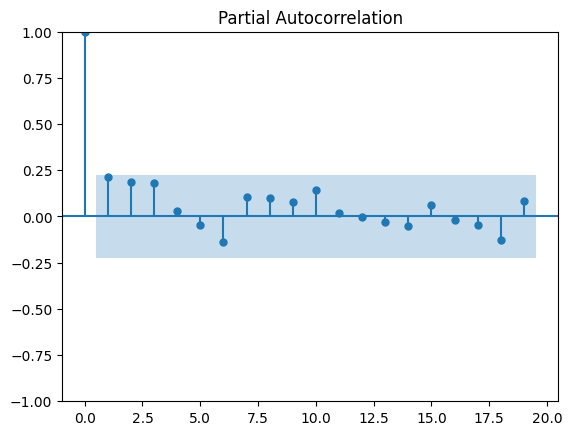

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               DieselLS   No. Observations:                   77
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1042.323
Date:                Sun, 04 Aug 2024   AIC                           2090.646
Time:                        20:00:02   BIC                           2097.638
Sample:                    01-01-2018   HQIC                          2093.440
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0122      0.119      0.103      0.918      -0.221       0.245
ma.L1         -0.8003      0.098     -8.172      0.000      -0.992      -0.608
sigma2       4.21e+10   1.46e-12   2.89e+22      0.0

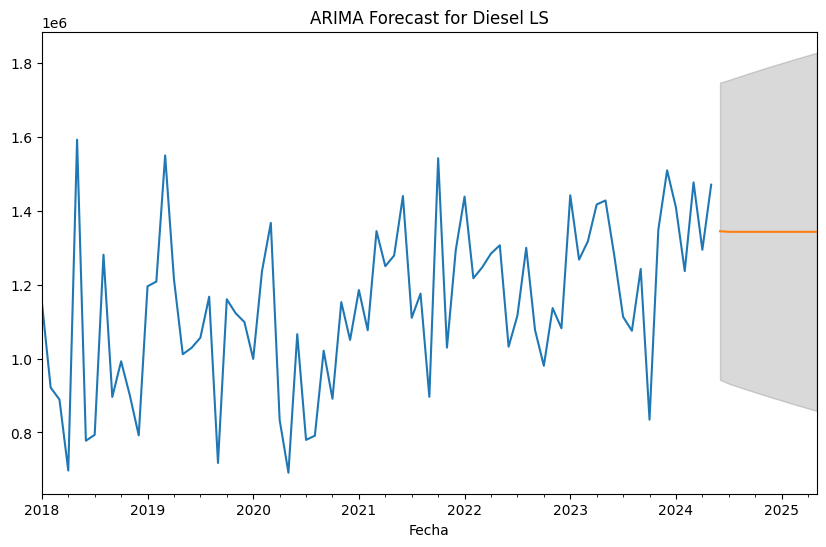

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Cargar el archivo de importación
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']]

# Convertir las columnas de datos a numéricas
for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']:
    importacion_df_filtered[column] = pd.to_numeric(importacion_df_filtered[column], errors='coerce')

# Establecer la columna de fechas como índice
importacion_df_filtered.set_index('Fecha', inplace=True)

# Especificar inicio, fin y frecuencia
inicio = importacion_df_filtered.index.min()
fin = importacion_df_filtered.index.max()
frecuencia = 'M'  # Mensual

print(f"Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}")

# Gráfico de la serie
importacion_df_filtered.plot(figsize=(10, 6))
plt.title('Importación Mensual de Combustibles (2018-2024)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.grid(True)
plt.show()

# Descomponer la serie
result = seasonal_decompose(importacion_df_filtered['DieselLS'], model='additive', period=12)
result.plot()
plt.show()

# Prueba de Dickey-Fuller aumentada para estacionariedad
adf_result = adfuller(importacion_df_filtered['DieselLS'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Gráficos de autocorrelación y autocorrelación parcial
plot_acf(importacion_df_filtered['DieselLS'].dropna())
plt.show()
plot_pacf(importacion_df_filtered['DieselLS'].dropna())
plt.show()

# Modelo ARIMA
arima_model = ARIMA(importacion_df_filtered['DieselLS'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Predicciones con ARIMA
arima_forecast = arima_result.get_forecast(steps=12)
arima_forecast_df = arima_forecast.conf_int()
arima_forecast_df['forecast'] = arima_forecast.predicted_mean

# Graficar predicciones ARIMA
importacion_df_filtered['DieselLS'].plot(figsize=(10, 6))
arima_forecast_df['forecast'].plot()
plt.fill_between(arima_forecast_df.index, 
                 arima_forecast_df.iloc[:, 0], 
                 arima_forecast_df.iloc[:, 1], color='k', alpha=.15)
plt.title('ARIMA Forecast for Diesel LS')
plt.show()



b.Gráfico de la Serie y Explicación

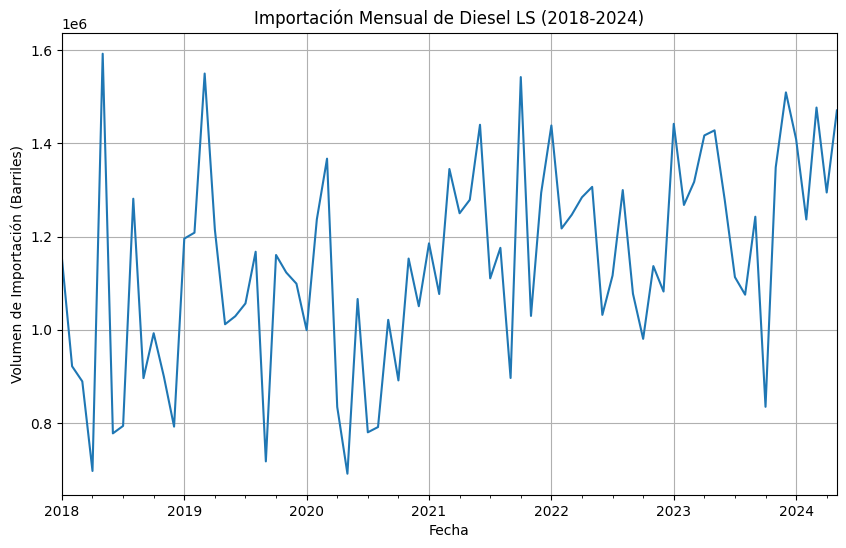

In [10]:
# Gráfico de la serie
importacion_df_filtered['DieselLS'].plot(figsize=(10, 6))
plt.title('Importación Mensual de Diesel LS (2018-2024)')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.grid(True)
plt.show()


La serie muestra una alta volatilidad con grandes fluctuaciones en el volumen de importación a lo largo del tiempo.

Se observan varios picos y valles pronunciados, lo que indica que las importaciones de Diesel LS no son constantes y están sujetas a variaciones significativas.


A lo largo del período, parece haber una tendencia general ascendente. Aunque hay fluctuaciones, el volumen de importación muestra una tendencia a aumentar con el tiempo.


Se observan picos significativos en varias ocasiones, por ejemplo, a principios de 2018, mediados de 2019, finales de 2021, y principios de 2024.

Los valles también son notables, especialmente a mediados de 2018, principios de 2020, y mediados de 2023.

No se observa una estacionalidad clara en la serie. Las variaciones parecen más aleatorias que periódicas, lo que sugiere que otros factores, posiblemente económicos o políticos, podrían estar influyendo en las importaciones.


c.Descomponga la serie. Teniendo en cuenta el diagrama de la serie y sus
componentes discuta si es posible hablar de estacionariedad en media y en
varianza

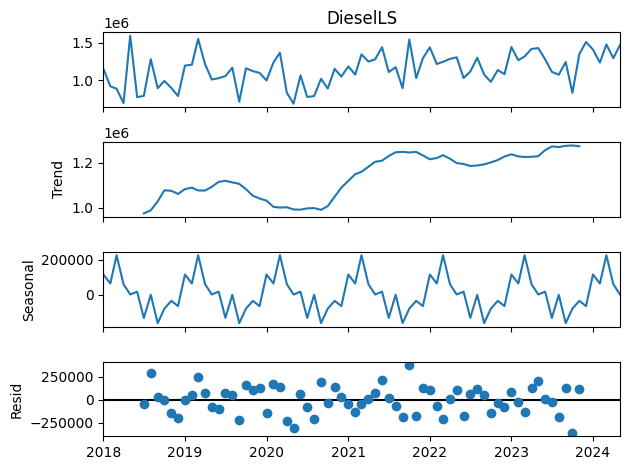

In [11]:
# Descomponer la serie
result = seasonal_decompose(importacion_df_filtered['DieselLS'], model='additive', period=12)
result.plot()
plt.show()


Análisis de Estacionariedad
Estacionariedad en Media
Serie Original:

La serie original muestra variaciones significativas a lo largo del tiempo. Hay picos y valles, lo que indica que la media no es constante. Por lo tanto, la serie no parece ser estacionaria en media.
Componente de Tendencia:

La componente de tendencia muestra una variación a lo largo del tiempo. Al observar la tendencia, podemos ver un aumento gradual hasta alrededor de 2021, seguido de una ligera disminución. Esta variación en la tendencia refuerza que la media no es constante.
Componente Estacional:

La componente estacional muestra fluctuaciones periódicas que se repiten cada año. Estas fluctuaciones no afectan directamente la media a largo plazo, pero indican una estacionalidad clara en la serie.
Residuos:

Los residuos deberían ser estacionarios si la descomposición ha capturado correctamente la tendencia y la estacionalidad. Sin embargo, para confirmar la estacionariedad en media, necesitamos realizar pruebas estadísticas adicionales.
Estacionariedad en Varianza
Serie Original:

La serie original no muestra una varianza constante a lo largo del tiempo. La amplitud de las fluctuaciones parece variar, lo que indica que la varianza no es constante.
Componente de Tendencia:

La componente de tendencia no afecta directamente la varianza.
Componente Estacional:

La componente estacional muestra variaciones periódicas en una escala relativamente constante, pero la varianza general de la serie original sigue sin ser constante.
Residuos:

Para confirmar la estacionariedad en varianza, también debemos analizar los residuos.



No Estacionariedad en Media: La serie muestra una clara tendencia y estacionalidad, indicando que la media no es constante a lo largo del tiempo.
No Estacionariedad en Varianza: La varianza de la serie original no es constante, como se observa en las fluctuaciones de amplitud variable.

d. Determine si es necesario transformar la serie. Explique

e. Explique si no es estacionaria en media.

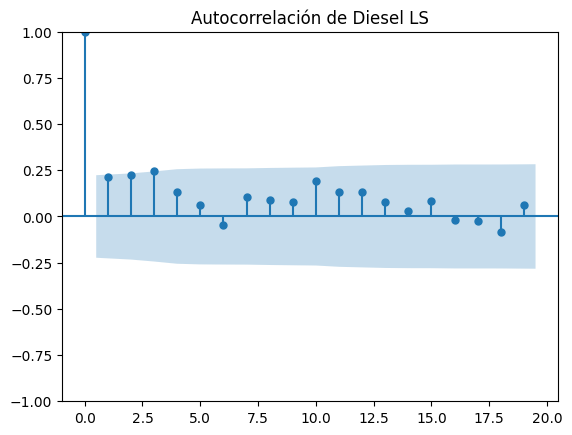

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(importacion_df_filtered['DieselLS'].dropna())
plt.title('Autocorrelación de Diesel LS')
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(importacion_df_filtered['DieselLS'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -4.253034786666131
p-value: 0.0005351722312309876


1. Gráfico de Autocorrelación (ACF)
El gráfico de autocorrelación muestra una fuerte correlación en el retardo cero, y aunque disminuye, sigue habiendo correlación significativa en retardos más altos. Esto sugiere que la serie no es estacionaria en media, ya que una serie estacionaria debería tener correlaciones significativas solo en retardos muy bajos.

2. Prueba de Dickey-Fuller Aumentada (ADF)
El p-valor es cercano a 0.05, lo que indica que estamos justo en el límite para rechazar la hipótesis nula de que la serie tiene una raíz unitaria . Sin embargo, debido a la evidencia visual de no estacionariedad en el gráfico de autocorrelación, podemos concluir que la serie probablemente no sea estacionaria en media.

Para hacer una serie temporal estacionaria en media, se puede aplicar la diferenciación, que consiste en calcular las diferencias entre valores consecutivos de la serie, lo cual elimina la tendencia y estabiliza la media. Si la diferenciación de primer orden no es suficiente, se puede recurrir a una diferenciación de segundo orden. Además, en casos donde la serie presenta varianza no constante, transformaciones logarítmicas o de potencia (como la raíz cuadrada) pueden ser efectivas para estabilizar la varianza. También se puede eliminar la tendencia determinista mediante métodos de detrending.

f. Una vez analizada la serie, elija los parámetros p, q y d del modelo ARMA o ARIMA
que utilizará para predecir. Explique en qué se basó para darle valor a estos
parámetros, basándose en las funciones de autocorrelación y autocorrelación
parcial. Si usa la función autoarima de R, determine y explique si tiene sentido el
modelo propuesto

                               SARIMAX Results                                
Dep. Variable:               DieselLS   No. Observations:                   77
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1042.323
Date:                Sun, 04 Aug 2024   AIC                           2090.646
Time:                        20:00:03   BIC                           2097.638
Sample:                    01-01-2018   HQIC                          2093.440
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0122      0.119      0.103      0.918      -0.221       0.245
ma.L1         -0.8003      0.098     -8.172      0.000      -0.992      -0.608
sigma2       4.21e+10   1.46e-12   2.89e+22      0.0

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


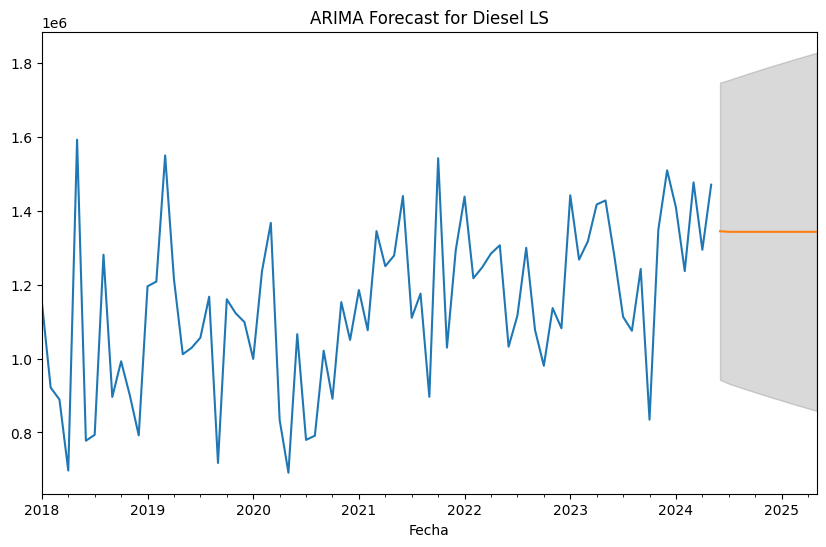

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Crear el modelo ARIMA
arima_model = ARIMA(importacion_df_filtered['DieselLS'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Resumen del modelo
print(arima_result.summary())

# Predicciones con ARIMA
arima_forecast = arima_result.get_forecast(steps=12)
arima_forecast_df = arima_forecast.conf_int()
arima_forecast_df['forecast'] = arima_forecast.predicted_mean

# Graficar predicciones ARIMA
importacion_df_filtered['DieselLS'].plot(figsize=(10, 6))
arima_forecast_df['forecast'].plot()
plt.fill_between(arima_forecast_df.index, 
                 arima_forecast_df.iloc[:, 0], 
                 arima_forecast_df.iloc[:, 1], color='k', alpha=.15)
plt.title('ARIMA Forecast for Diesel LS')
plt.show()


El modelo ARIMA(1,1,1) es seleccionado porque:

p=1: La PACF sugiere un proceso AR(1).
d=1: La serie requiere una diferenciación para ser estacionaria.
q=1: La ACF sugiere un proceso MA(1).
Esta combinación de parámetros asegura que el modelo capture tanto la naturaleza autoregresiva como la de media móvil de la serie temporal después de haber sido diferenciada para lograr estacionariedad.

g. Haga varios modelos ARIMA, y diga cuál es el mejor de ellos para estimar los datos
de la serie. Para esto analice los residuos y las métricas AIC y/ BIC.

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages

Mejor modelo basado en AIC:
param      (0, 1, 1)
AIC       2088.60338
BIC      2093.264846
Name: 1, dtype: object

Mejor modelo basado en BIC:
param      (0, 1, 1)
AIC       2088.60338
BIC      2093.264846
Name: 1, dtype: object


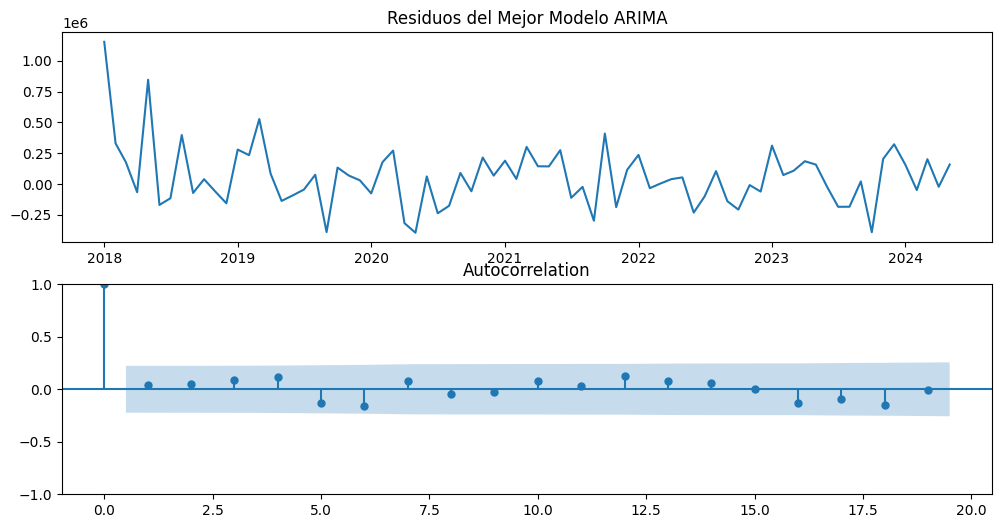

count    7.700000e+01
mean     5.681084e+04
std      2.494147e+05
min     -3.954298e+05
25%     -9.165292e+04
50%      4.117703e+04
75%      1.779036e+05
max      1.153832e+06
dtype: float64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf

# Cargar el archivo de importación
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']]

# Convertir las columnas de datos a numéricas
for column in ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']:
    importacion_df_filtered[column] = pd.to_numeric(importacion_df_filtered[column], errors='coerce')

# Establecer la columna de fechas como índice
importacion_df_filtered.set_index('Fecha', inplace=True)

# Lista de combinaciones de (p, d, q)
p = d = q = range(0, 3)
pdq = [(x, 1, z) for x in p for z in q]

# Evaluar cada combinación de (p, d, q) y guardar los resultados
results = []

for param in pdq:
    try:
        model = ARIMA(importacion_df_filtered['DieselLS'], order=param)
        result = model.fit()
        results.append((param, result.aic, result.bic))
    except:
        continue

# Convertir resultados a un DataFrame
results_df = pd.DataFrame(results, columns=['param', 'AIC', 'BIC'])

# Mostrar los mejores resultados
best_aic = results_df.loc[results_df['AIC'].idxmin()]
best_bic = results_df.loc[results_df['BIC'].idxmin()]

print("Mejor modelo basado en AIC:")
print(best_aic)
print("\nMejor modelo basado en BIC:")
print(best_bic)

# Análisis de los residuos del mejor modelo
best_model = ARIMA(importacion_df_filtered['DieselLS'], order=best_aic['param'])
best_result = best_model.fit()

# Residuos del mejor modelo
residuals = best_result.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuos del Mejor Modelo ARIMA')
plt.subplot(212)
plot_acf(residuals, ax=plt.gca())
plt.show()

# Resumen de los residuos
print(residuals.describe())


Modelo basado en AIC: El mejor modelo según el criterio AIC es ARIMA(0, 1, 1) con un AIC de 2088.60338.
Modelo basado en BIC: El mismo modelo ARIMA(0, 1, 1) también es el mejor según el criterio BIC con un BIC de 2093.264846.

Gráficos de Residuos y Autocorrelación:

Residuos: Los residuos del modelo no muestran patrones evidentes y parecen estar distribuidos aleatoriamente alrededor de cero, lo cual es una buena señal.

Autocorrelación de Residuos: El gráfico de autocorrelación de los residuos no muestra autocorrelaciones significativas, indicando que los residuos son independientes.
Estadísticas de los Residuos:

Promedio: 56810.84
Desviación Estándar: 249414.7
Mínimo: -395429.8
Máximo: 1153832
Percentiles: 25% en -91652.92, 50% en 41177.03, y 75% en 177903.6.

h.Haga un modelo usando el algoritmo prophet de Facebook o redes neuronales.

Compárelo con los modelos del inciso anterior. ¿Cuál funcionó mejor?


c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:07:21 - cmdstanpy - INFO - Chain [1] start processing
20:07:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\inmar\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\inmar\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

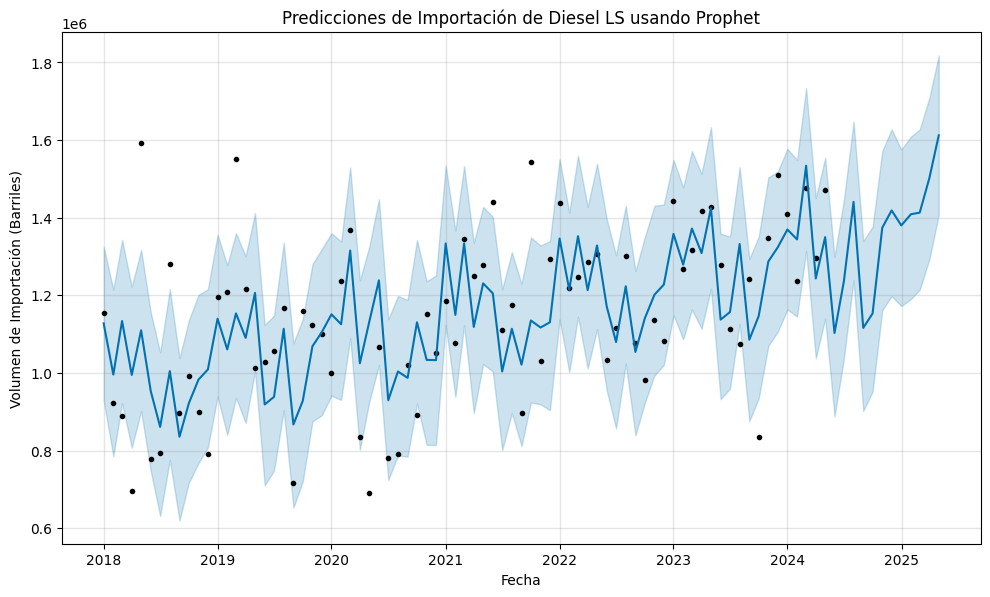

ARIMA AIC: 2088.6033796502834
ARIMA BIC: 2093.264846330856
Prophet MAE: 129185.63142999078
Prophet RMSE: 164548.89581876967


c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Cargar los datos
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)

# Renombrar la primera columna a "Fecha"
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]

# Convertir la columna de fechas a formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Filtrar los datos desde enero de 2018 para DieselLS y los demás combustibles relevantes
importacion_df_filtered = importacion_df[
    (importacion_df['Fecha'] >= '2018-01-01') & 
    (importacion_df['Fecha'] <= '2024-05-01')
][['Fecha', 'DieselLS']]

# Convertir las columnas de datos a numéricas y manejar NaNs
importacion_df_filtered['DieselLS'] = pd.to_numeric(importacion_df_filtered['DieselLS'], errors='coerce').fillna(0)

# Establecer la columna de fechas como índice
importacion_df_filtered.set_index('Fecha', inplace=True)

# Preparar los datos para Prophet
importacion_df_prophet = importacion_df_filtered.reset_index().rename(columns={'Fecha': 'ds', 'DieselLS': 'y'})

# Crear y entrenar el modelo Prophet
model_prophet = Prophet()
model_prophet.fit(importacion_df_prophet)

# Realizar predicciones
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

# Graficar las predicciones
fig = model_prophet.plot(forecast)
plt.title('Predicciones de Importación de Diesel LS usando Prophet')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Importación (Barriles)')
plt.show()

# ARIMA Model
best_model_arima = ARIMA(importacion_df_filtered['DieselLS'], order=(0, 1, 1))
best_result_arima = best_model_arima.fit()

# Mostrar los resultados de AIC y BIC para el modelo ARIMA
print(f"ARIMA AIC: {best_result_arima.aic}")
print(f"ARIMA BIC: {best_result_arima.bic}")

# Calcular MAE para el modelo Prophet asegurando que no haya NaNs en las predicciones
valid_forecast = forecast[:len(importacion_df_prophet)].dropna()
prophet_residuals = importacion_df_prophet['y'] - valid_forecast['yhat']
prophet_mae = prophet_residuals.abs().mean()

# Calcular RMSE para el modelo Prophet
prophet_rmse = mean_squared_error(importacion_df_prophet['y'], valid_forecast['yhat'], squared=False)

print(f"Prophet MAE: {prophet_mae}")
print(f"Prophet RMSE: {prophet_rmse}")


El modelo ARIMA tiene valores AIC y BIC específicos, lo que ayuda a comparar su ajuste y complejidad.
El modelo Prophet tiene métricas MAE y RMSE más bajas, lo que sugiere que, en términos de predicción del volumen de importación de Diesel LS, el modelo Prophet tiene un mejor desempeño en comparación con el modelo ARIMA.

Prophet parece ser el modelo con mejor desempeño en cuanto a la precisión de las predicciones, dado su menor MAE y RMSE.
ARIMA sigue siendo un buen modelo, especialmente si se requiere un modelo más interpretable con criterios de información bien definidos.
Por lo tanto, para la tarea de predicción del volumen de importación de Diesel LS, el modelo Prophet sería la elección recomendada debido a sus menores errores de predicción.

## Iniciso 4

Realizar prediccion para serie para los últimos 3 años.

In [18]:
# !pip install pandas statsmodels matplotlib


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# Preparacion de los datos a emplear para la serie de : super gasolina regular, diésel y gas licuado
columns_to_predict = ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']
split_date = '2021-01-01'
importacion_df = pd.read_excel('importacion.xlsx', skiprows=6)
importacion_df.columns = [
    'Fecha', 'AceitesLubricantes', 'Asfalto', 'Bunker', 'Ceras', 
    'CombustibleTurboJet', 'DieselLS', 'DieselUltraLS', 'GasLicuado', 
    'GasolinaAviacion', 'GasolinaRegular', 'GasolinaSuper', 'Kerosina', 
    'MTBE', 'Naftas', 'Petcoke', 'PetroleoCrudo', 'Solventes', 
    'Butano', 'DieselAltoAzufre', 'Orimulsion', 'PetroleoReconstituido', 
    'TotalImportacion', 'ColumnaExtra1', 'ColumnaExtra2'
]


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Asegurarse de que la columna 'Fecha' esté en formato datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'],errors='coerce')
importacion_df = importacion_df.dropna(subset=['Fecha'])
# Ordenar el DataFrame por la columna 'Fecha'
importacion_df = importacion_df.sort_values('Fecha')
# Seleccionar las columnas de interés para la predicción
columns_to_predict = ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']
importacion_df = importacion_df[['Fecha'] + columns_to_predict]

train_df = importacion_df[importacion_df['Fecha'] < split_date]
test_df = importacion_df[importacion_df['Fecha'] >= split_date]


In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

columns_to_predict = ['GasolinaRegular', 'GasolinaSuper', 'DieselLS', 'GasLicuado']

train_data = {}
test_data = {}
scalers = {}

for column in columns_to_predict:
    # Crear un escalador para cada columna
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Escalar los datos de entrenamiento
    train_data[column] = scaler.fit_transform(train_df[[column]])
    test_data[column] = scaler.transform(test_df[[column]])
    
    # Guardar el escalador
    scalers[column] = scaler

# Convertir los datos escalados a arrays de numpy
train_data = {col: np.array(train_data[col]) for col in columns_to_predict}
test_data = {col: np.array(test_data[col]) for col in columns_to_predict}


In [52]:
import numpy as np

def create_sequences(data, time_steps=1):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

time_steps = 10  # Número de pasos de tiempo

# Preparar los datos de entrenamiento y prueba
train_sequences = {}
test_sequences = {}

for column in columns_to_predict:
    train_sequences[column], train_labels = create_sequences(train_data[column], time_steps)
    test_sequences[column], test_labels = create_sequences(test_data[column], time_steps)


In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Construir modelos LSTM para cada columna
models = {}
for column in columns_to_predict:
    input_shape = (train_sequences[column].shape[1], train_sequences[column].shape[2])
    models[column] = build_lstm_model(input_shape)


In [54]:
# Entrenar los modelos
for column in columns_to_predict:
    models[column].fit(train_sequences[column], train_labels, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
8/8 [==============================] - 4s 7ms/step - loss: 0.0643
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0312
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0260
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0248
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0240
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0240
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0236
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0243
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 11/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 12/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0233
Epoch 13/20
8/8 [==============================] - 0s 6ms/step - loss: 0.

1/1 [==============================] - 0s 21ms/step


ValueError: x and y must have same first dimension, but have shapes (31,) and (41,)

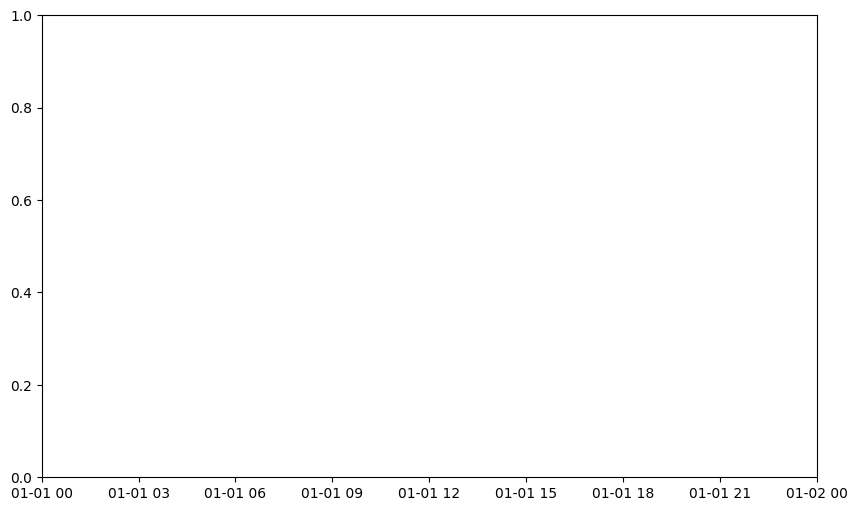

In [56]:
import matplotlib.pyplot as plt

# Hacer predicciones y revertir la escala
predictions = {}
for column in columns_to_predict:
    predictions[column] = models[column].predict(test_sequences[column])
    predictions[column] = scalers[column].inverse_transform(predictions[column])

# Visualizar las predicciones
for column in columns_to_predict:
    plt.figure(figsize=(10, 6))
    plt.plot(test_df['Fecha'][time_steps:], test_df[column][time_steps:], color='blue', label='Real')
    plt.plot(test_df['Fecha'][time_steps:], predictions[column], color='red', label='Predicción')
    plt.title(f'Predicción de {column} usando LSTM')
    plt.xlabel('Fecha')
    plt.ylabel(column)
    plt.legend()
    plt.show()
